<a href="https://colab.research.google.com/github/RufinoMartin/Energy-Index-Model/blob/main/Indice_Energetico_Modelo_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Presentacion

###  Integrantes:

**Pedro Vernengo:** Politólogo y Analista de Planificación de Políticas de Salud Pública. 

**Rufino Martín:** Analista de Datos e Investigador en Geopolitica e Inteligencia.

### Tema de Investigacion y Desarrollo:

Politicas Gubernamentales y sus efectos economicos: estudio de la economia mundial durante el Covid-19. 

### Objetivos : 

- Analizar la variación del precio de commodities y los índices bursátiles en relación a las medidas gubernamentales por COVID19, dentro del marco temporal 2019-2022.
- Exploración de relaciones entre las variables y generación de visualizaciones sobre la variación del precio de commodities, a fines de nutrir potenciales explicaciones. 
- Creación de modelo de aprendizaje automático para evaluar y predecir valores de los activos. 


### Repositorio: 

https://github.com/RufinoMartin/DataScience2021




# Los Datos y sus variables

- ### Primer Grupo de Variables : “Medidas Gubernamentales frente al COVID”

Definición: Medidas ejecutivas sanitarias, economicas y sociales en 168 paises a raiz de la situacion Covid19.

Operacionalización: Conjuntos de Variables definidas y operacionalizadas por la Universidad de Oxford, obtenidas de los ministerios de salud de todos los gobiernos.

Notebook: Restricciones_Covid_Final.ipynb.

Fuente: Universidad de Oxford.

- ### Segundo Grupo de Variables : “Precio de Indices de Commodities”

Definición: Precio agrupado de Indices de Commodities (Metales, Industria, Agro, Alimentos, Energia).

Operacionalización: Conteo y promediado de precios históricos.

Notebook: Indices_Commodities_Final.ipynb

Fuente: Fondo Monetario Internacional.

- ### Tercer Grupo de Variables : “Precio de Índices Bursátiles”

Definición: Precios de los mayores Índices Bursatiles Mundiales

Operacionalización: Conteo y promediado de precios históricos.

Notebook: Indices_Bursatiles_Finales.ipynb.

Fuente: Sitio Web MarketWatch.

# Importacion de Librerias

In [2]:

# Manipulacion de dataframes y arrays

import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import pandas_profiling
from pandas_profiling import ProfileReport
import numpy as np
from functools import reduce

# Graficos

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
import plotly.express as px

# Configuración matplotlib

plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Librerias para Modelos de Regresion Lineal

# Preprocesado y modelado

from scipy import stats
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm

# Evaluacion y Optimizacion Modelo

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Configuración warnings

import warnings
warnings.filterwarnings('ignore')

Por la gran cantidad y tamaño de los datasets, se ha realizado una digestion previa de los mismos. Para acceder a los notebooks preliminares donde se realizó dicha labor, consultar los notebooks del repositorio.
 
El resultado del procesamiento preliminar la misma ha sido un archivo .CSV, que procedemos a importar, y que de no ejecutarse correctamente el pd.read, se encuentra disponible aqui:
 
https://github.com/RufinoMartin/DataScience2021/blob/main/DatasetFinal.csv
 
Copiar el URL del Raw, y pegar:
 

In [3]:
df_Integrado = pd.read_csv('https://raw.githubusercontent.com/RufinoMartin/Energy-Index-Model/main/DatasetFinal.csv')

# Data Wrangling

Correr celdas para utilizar el dataframe correctamente editado mas adelante. 

Procedemos a corregir los tipos de datos de CountryName y DateTime.

In [ ]:
# Observamos que tipos de datos tenemos en el dataframe.

df_Integrado.dtypes

Unnamed: 0                          int64
Pais                               object
Fecha                              object
Ind. Rigor C19                    float64
Ind. Sanitario C19                float64
Ind. Apoyo Economico C19          float64
Promedio Respuesta Estatal C19    float64
Alimentos                         float64
Industrial                        float64
Agro                              float64
Metales                           float64
Energia                           float64
Promedio Commodities              float64
Dolar Americano                   float64
$S&P500                           float64
$SHA                              float64
$UKX                              float64
$SX5P                             float64
Promedio Bursatil                 float64
dtype: object

In [4]:
# Removemos columna residual

df_Integrado.drop(columns={'Unnamed: 0'}, inplace=True)

In [5]:
# 'Fecha' a formato DateTime

df_Integrado['Fecha'] = pd.to_datetime(df_Integrado['Fecha'])

In [6]:
# 'Pais' a formato String

df_Integrado['Pais'] = df_Integrado['Pais'].astype(str)

In [ ]:
# Corroboramos

df_Integrado.dtypes

Pais                                      object
Fecha                             datetime64[ns]
Ind. Rigor C19                           float64
Ind. Sanitario C19                       float64
Ind. Apoyo Economico C19                 float64
Promedio Respuesta Estatal C19           float64
Alimentos                                float64
Industrial                               float64
Agro                                     float64
Metales                                  float64
Energia                                  float64
Promedio Commodities                     float64
Dolar Americano                          float64
$S&P500                                  float64
$SHA                                     float64
$UKX                                     float64
$SX5P                                    float64
Promedio Bursatil                        float64
dtype: object

In [7]:
# Reordenamos Columnas

df_Integrado = df_Integrado[['Fecha', 'Pais', 'Ind. Rigor C19', 'Ind. Sanitario C19', 'Ind. Apoyo Economico C19','Promedio Respuesta Estatal C19',
                             'Alimentos','Industrial','Agro','Metales','Energia','Promedio Commodities',
                             'Dolar Americano','$S&P500','$SHA','$UKX','$SX5P','Promedio Bursatil']]

In [ ]:
df_Integrado.head(5)

,Fecha,Pais,Ind. Rigor C19,Ind. Sanitario C19,Ind. Apoyo Economico C19,Promedio Respuesta Estatal C19,Alimentos,Industrial,Agro,Metales,Energia,Promedio Commodities,Dolar Americano,$S&P500,$SHA,$UKX,$SX5P,Promedio Bursatil
0,2019-01-01,0,0.0,0.0,0.0,0.0,100.466542,118.836909,103.536150,114.711385,133.302098,117.078244,95.58,2704.10,2584.57,6968.85,2897.13,3788.6625
1,2019-02-01,0,0.0,0.0,0.0,0.0,98.772205,125.808562,103.608780,120.811052,136.048817,119.011525,96.16,2709.80,2940.95,7074.73,3029.67,3938.7875
2,2019-03-01,0,0.0,0.0,0.0,0.0,98.063110,127.539176,105.409046,121.105733,138.256367,119.910036,97.28,2834.40,3090.76,7279.19,3117.01,4080.3400
3,2019-04-01,0,0.0,0.0,0.0,0.0,101.569201,129.656529,104.681017,121.924057,143.768294,123.416731,97.48,2945.83,3078.34,7418.22,3199.51,4160.4750
4,2019-05-01,0,0.0,0.0,0.0,0.0,98.094289,129.330578,105.436360,121.161561,139.410557,120.477541,97.61,2752.06,2898.70,7161.71,3042.89,3963.8400


In [8]:
#Redondeamos decimales

df_Integrado = round(df_Integrado, 2)

In [9]:
# Dropeamos todas las filas en las cuales la fecha va mas alla de enero del 2022, ya que hasta alli llega nuestra fuente de Commodities actualizada por el FMI. 

df_Integrado.drop(df_Integrado.loc[df_Integrado['Fecha'] > '2022-01-01 01:00:00'].index, inplace=True)


In [ ]:
df_Integrado.shape

(7812, 18)

In [ ]:
df_Integrado.head(1)

,Fecha,Pais,Ind. Rigor C19,Ind. Sanitario C19,Ind. Apoyo Economico C19,Promedio Respuesta Estatal C19,Alimentos,Industrial,Agro,Metales,Energia,Promedio Commodities,Dolar Americano,$S&P500,$SHA,$UKX,$SX5P,Promedio Bursatil
0,2019-01-01,0,0.0,0.0,0.0,0.0,100.47,118.84,103.54,114.71,133.3,117.08,95.58,2704.1,2584.57,6968.85,2897.13,3788.66


### **Diccionario de Datos**

Nuestro Dataframe se compone de Indices, es decir, todas las variables son ya aglutinantes de otras variables. Los Indices Gubernamentales de C19, por ejemplo, se componen de multiples variables aisladas. Los Indices Bursatiles representan bolsas de acciones de decentas o cientos de empresas.Los Indices de Commodities incluyen los precios mundiales de cientos o miles de productos de cada sector.


- ***Gubernamentales C-19:***

"Indice Rigor C19" (Confinamientos, Restricciones, Prohibiciones)

"Indice Sanitario C19" (Modificaciones protocolares, Regimen de testeos, inversion en salud, pasaporte sanitario)

"Indice Apoyo Economico C19" (Subvenciones economicas, planes economicos ejecutivos)

***Superindice:*** "Promedio Respuesta Estatal C19" (Sintesis de todos los indicadores)


- ***Bursatiles:***

"Dolar Americano" ( DYX o The U.S. Dollar Index is used to measure the value of the dollar against a basket of six world currencies: Euro, Swiss Franc, Japanese Yen, Canadian dollar, British pound, and Swedish Krona)

"S&P500" ("Standard and Poor 500" is a stock market index tracking the performance of 500 large companies listed on stock exchanges in the United States)

"SHA" (The Shanghai Stock Exchange is one of the three stock exchanges operating independently in mainland China. The Shanghai Stock Exchange is the world's 3rd largest stock market by market capitalization at US$7.62 trillion as of July 2021)

"UKX" (The "FTSE 100 Index" The Financial Times Stock Exchange 100 Index, is a share index of the 100 companies listed on the London Stock Exchange with the highest market capitalisation.

"SX5P" (The STOXX Europe 50 index provides a blue-chip representation of supersector leaders in Europe covering almost 50% of the free-float market capitalization of the European stock market.)

***Superindice:***: "Promedio Bursatil" (Promedia los 4 Indices superiores, a excepcion del dolar)

- ***Comoddities (FMI):***
 
 
 "Alimentos",	"Industrial",	"Agro",	"Metales" y "Energia".

 ***Superindice:***:  "Promedio Commodities" ( Promedia los 5 Indices superiores)


# Exploracion de Datos (EDA) 

## Exploration Estadistica Descriptiva

In [ ]:
def EDA(df_Integrado):
    
    print('\033[1m' +'EXPLORATORY DATA ANALYSIS :'+ '\033[0m\n')
    print('\033[1m' + 'Shape (rows, columns):' + '\033[0m')
    print(df_Integrado.shape, 
          
          '\n------------------------------------------------------------------------------------\n')
    
    print('\033[1m' + 'Columnas :' + '\033[0m')
    print(df_Integrado.columns, 
          
          '\n------------------------------------------------------------------------------------\n')
    
    print('\033[1m' + 'Tipos de Datos y Valores Faltantes:' + '\033[0m')
    print(df_Integrado.info(), 
          
          '\n------------------------------------------------------------------------------------\n')
    
    for col in df_Integrado.columns:
        print('\033[1m' + 'Valores Unicos en {} :'.format(col) + '\033[0m',len(df_Integrado[col].unique()))

    print('\n------------------------------------------------------------------------------------\n')
    
    print('\033[1m' + 'Estadisticas Resumidas :' + '\033[0m')
    print(df_Integrado.describe(include='all'), 
          
          '\n------------------------------------------------------------------------------------\n')
    

    
    print('\033[1m' + 'Numero de valores duplicados :' + '\033[0m')
    print(df_Integrado.duplicated().sum())
          
EDA(df_Integrado)

EXPLORATORY DATA ANALYSIS :

Shape (rows, columns):
(7812, 18) 
------------------------------------------------------------------------------------

Columnas :
Index(['Fecha', 'Pais', 'Ind. Rigor C19', 'Ind. Sanitario C19', 'Ind. Apoyo Economico C19', 'Promedio Respuesta Estatal C19', 'Alimentos', 'Industrial', 'Agro', 'Metales', 'Energia', 'Promedio Commodities', 'Dolar Americano', '$S&P500', '$SHA', '$UKX', '$SX5P', 'Promedio Bursatil'], dtype='object') 
------------------------------------------------------------------------------------

Tipos de Datos y Valores Faltantes:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7812 entries, 0 to 7811
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Fecha                           7812 non-null   datetime64[ns]
 1   Pais                            7812 non-null   object        
 2   Ind. Rigor C19                  

In [ ]:
CorrelacionP = df_Integrado.corr(method="pearson")
CorrelacionP

,Ind. Rigor C19,Ind. Sanitario C19,Ind. Apoyo Economico C19,Promedio Respuesta Estatal C19,Alimentos,Industrial,Agro,Metales,Energia,Promedio Commodities,Dolar Americano,$S&P500,$SHA,$UKX,$SX5P,Promedio Bursatil
Ind. Rigor C19,1.000000,0.935537,0.466226,0.926859,0.077095,0.119562,0.089719,0.158828,-0.094368,-0.002237,-0.220385,-0.033822,0.073303,-0.313691,-0.222339,-0.157116
Ind. Sanitario C19,0.935537,1.000000,0.481700,0.988508,0.122100,0.190871,0.098328,0.196720,0.047651,0.101020,-0.309296,0.190960,0.272122,-0.147820,-0.025939,0.055052
Ind. Apoyo Economico C19,0.466226,0.481700,1.000000,0.606251,0.089921,0.123649,0.104384,0.158820,-0.041382,0.031972,-0.223629,-0.025092,0.086496,-0.242134,-0.174859,-0.116840
Promedio Respuesta Estatal C19,0.926859,0.988508,0.606251,1.000000,0.122846,0.190954,0.104961,0.202706,0.030717,0.092413,-0.316613,0.162585,0.255959,-0.177954,-0.057850,0.024976
Alimentos,0.077095,0.122100,0.089921,0.122846,1.000000,0.968354,0.978775,0.973262,0.823188,0.949067,-0.467623,0.211928,0.293175,0.064422,0.151561,0.177087
Industrial,0.119562,0.190871,0.123649,0.190954,0.968354,1.000000,0.941010,0.983979,0.795228,0.925454,-0.627583,0.308678,0.428212,0.104022,0.200449,0.257765
Agro,0.089719,0.098328,0.104384,0.104961,0.978775,0.941010,1.000000,0.971960,0.721614,0.883581,-0.476861,0.046925,0.192988,-0.084243,-0.018798,0.013734
Metales,0.158828,0.196720,0.158820,0.202706,0.973262,0.983979,0.971960,1.000000,0.732907,0.893808,-0.607694,0.167963,0.327789,-0.047559,0.048303,0.105869
Energia,-0.094368,0.047651,-0.041382,0.030717,0.823188,0.795228,0.721614,0.732907,1.000000,0.958679,-0.323707,0.628039,0.553168,0.494812,0.607373,0.615222
Promedio Commodities,-0.002237,0.101020,0.031972,0.092413,0.949067,0.925454,0.883581,0.893808,0.958679,1.000000,-0.435900,0.460568,0.470217,0.296816,0.407189,0.430122


## Exploracion Visual

### Analisis Multivariado para los Indices Gubernamentales C-19

In [ ]:
# Correr si hay errores en visualizaciones.

%matplotlib inline
plt.close('all')

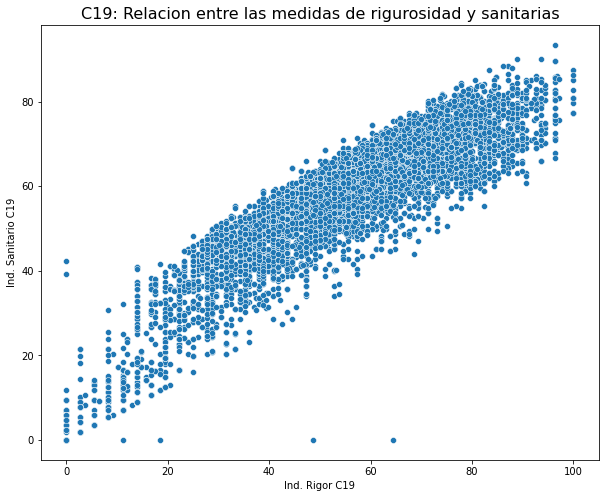

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Ind. Rigor C19',y='Ind. Sanitario C19',data=df_Integrado)
plt.title('C19: Relacion entre las medidas de rigurosidad y sanitarias', fontsize=16)
plt.show()

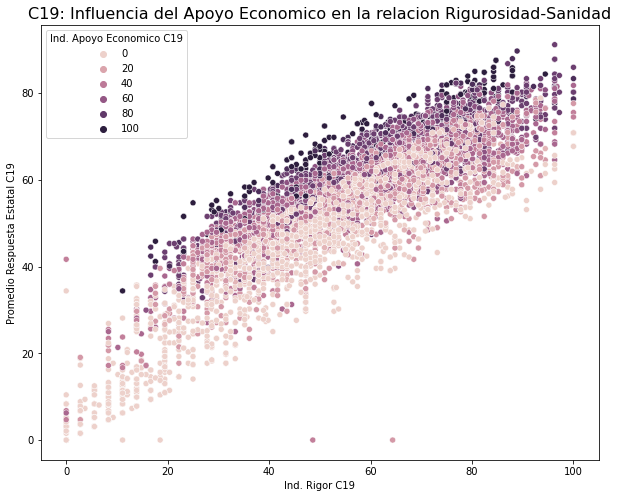

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Ind. Rigor C19',y='Promedio Respuesta Estatal C19',data=df_Integrado,hue='Ind. Apoyo Economico C19')
plt.title('C19: Influencia del Apoyo Economico en la relacion Rigurosidad-Sanidad', fontsize=16)
plt.show()



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


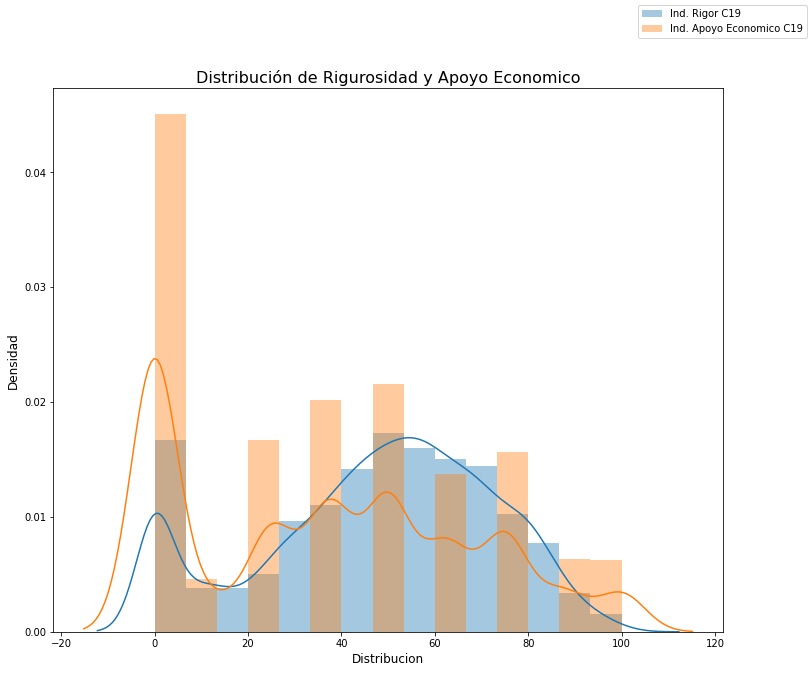

In [ ]:
#Grafico compartido para las distribuciones del Indice de Rigor y de Apoyo Economico. 

fig = plt.figure(figsize=(12,10))

sns.distplot(df_Integrado['Ind. Rigor C19'], kde=True, hist=True, bins=15, label='Ind. Rigor C19')
sns.distplot(df_Integrado['Ind. Apoyo Economico C19'], kde=True, hist=True, bins=15, label='Ind. Apoyo Economico C19')

fig.legend()
plt.xlabel('Distribucion', fontsize=12)
plt.ylabel('Densidad', fontsize=12)
plt.title('Distribución de Rigurosidad y Apoyo Economico', fontsize=16)

plt.show()

**Observaciones**

 Las visualizaciones refuerzan lo que arroja la correlacion de Pearson: Los indices de medidas gubernamentales para el Covid19 guardan gran relacion entre si. Esto tiene sentido:

1) porque comparten algunos de los indicadores de los cuales se conforman.

2) porque los indices reflejan politicas ejecutivas, que generalmente aumentaron o dismninuyeron de forma conjunta y en respuesta al incremento de casos/contagios. 

Tambien puede apreciarse la influencia del apoyo economico en el incremento de rigor y de respuesta gubernamental. 

### Analisis Univariado para los Indices de Commodities 
 

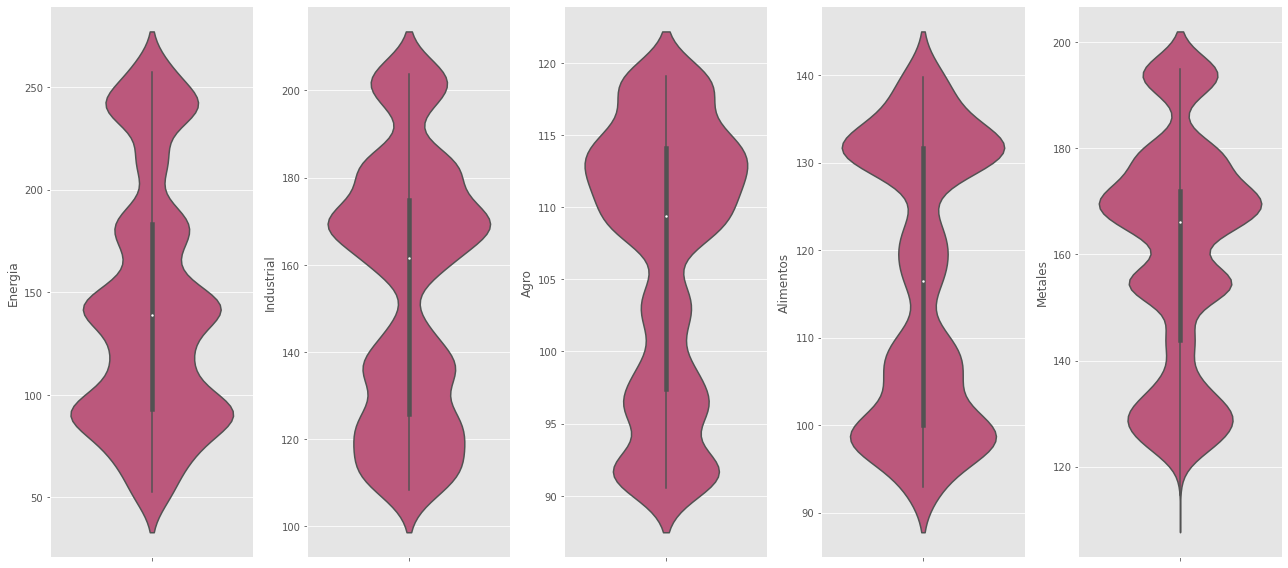

In [ ]:
variables1 = ['Energia', 'Industrial', 
             'Agro','Alimentos','Metales']

fig, axes = plt.subplots(1, len(variables1), figsize=(18,8))
for ax, variable1 in zip(axes, variables1):
    ax = sns.violinplot( y=variable1, data=df_Integrado, ax=ax, palette='plasma')
plt.tight_layout()

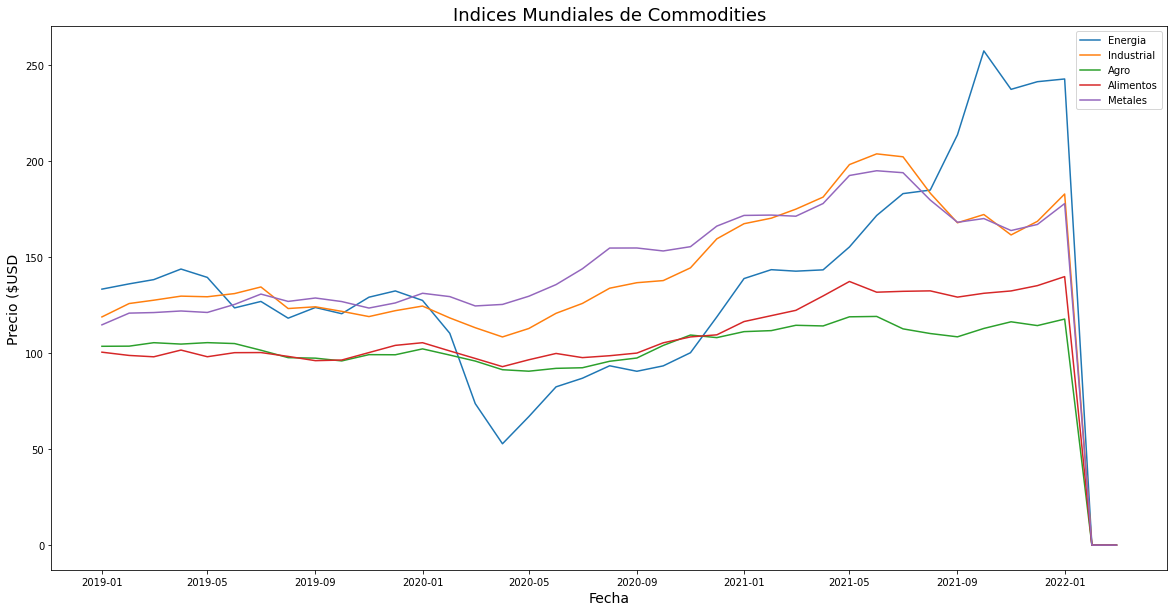

In [ ]:
# Indices de Commodities

fig, ax = plt.subplots(figsize=(20,10))

ax.plot(df_Integrado.Fecha, df_Integrado['Energia'], label='Energia')
ax.plot(df_Integrado.Fecha, df_Integrado['Industrial'], label='Industrial')
ax.plot(df_Integrado.Fecha, df_Integrado['Agro'], label='Agro')
ax.plot(df_Integrado.Fecha, df_Integrado['Alimentos'],label='Alimentos')
ax.plot(df_Integrado.Fecha, df_Integrado['Metales'],label='Metales')

plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Precio ($USD', fontsize=14)

plt.legend()
plt.title('Indices Mundiales de Commodities', fontsize=18)
plt.show()

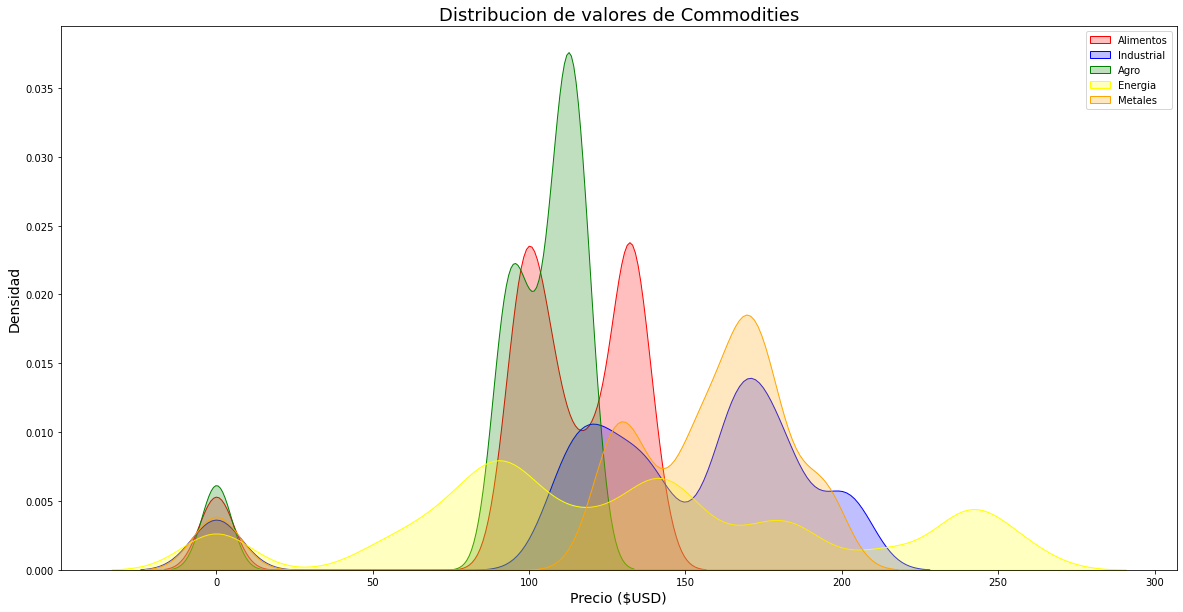

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))

sns.kdeplot(df_Integrado.Alimentos, label='Alimentos', shade=True, color='red', )
sns.kdeplot(df_Integrado.Industrial, label='Industrial', shade=True, color='blue')
sns.kdeplot(df_Integrado.Agro, label='Agro', shade=True, color='green')
sns.kdeplot(df_Integrado.Energia, label='Energia', shade=True, color='yellow')
sns.kdeplot(df_Integrado.Metales, label='Metales', shade=True, color='orange')

plt.legend()
plt.title('Distribucion de valores de Commodities', fontsize=18)
plt.xlabel('Precio ($USD)', fontsize=14)
plt.ylabel('Densidad', fontsize=14)
plt.show()

**Observaciones **

Si bien todos los indices de commodities registran una megatendencia similar para el periodo estudiado (alza), tambien exhiben un comportamiento distinto entre si:

- El Indice Industrial y el de Metales poseen gran relacion. 
- El Indice de Alimentos y el de Agro poseen gran relacion. 
- El Indice de Energia resalta por su comportamiento propio o zigzageante, registrando la maxima baja y la maxima alta entre los indices, es decir, es el mas volatil. 

Por estos motivos, si bien se utilizará una variable que aglutina a estos Indices ("Promedio Commodities"), tambien se seguiran analizando estos indices de forma individual. 

### Analisis Univariado para los Indices Bursatiles.

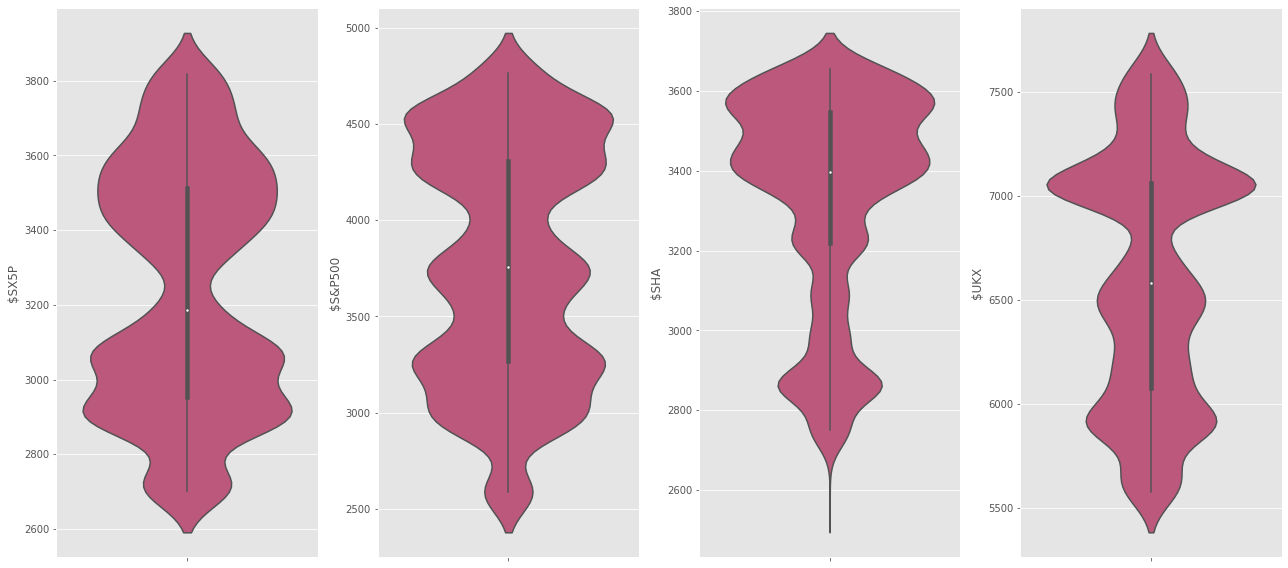

In [ ]:
variables = ['$SX5P', '$S&P500', 
             '$SHA','$UKX']

fig, axes = plt.subplots(1, len(variables), figsize=(18,8))
for ax, variable in zip(axes, variables):
    ax = sns.violinplot( y=variable, data=df_Integrado, ax=ax, palette='plasma')
plt.tight_layout()

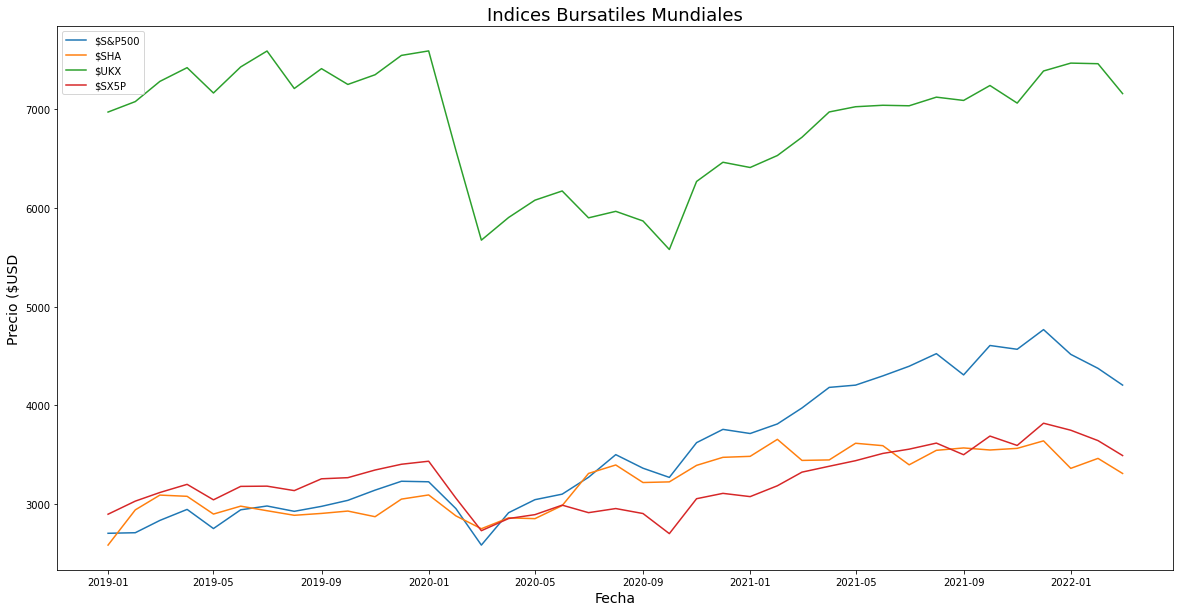

In [ ]:
# Indices de Commodities

fig, ax = plt.subplots(figsize=(20,10))

ax.plot(df_Integrado.Fecha, df_Integrado['$S&P500'],label='$S&P500')
ax.plot(df_Integrado.Fecha, df_Integrado['$SHA'],label='$SHA')
ax.plot(df_Integrado.Fecha, df_Integrado['$UKX'],label='$UKX')
ax.plot(df_Integrado.Fecha, df_Integrado['$SX5P'],label='$SX5P')

plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Precio ($USD', fontsize=14)
plt.legend()
plt.title('Indices Bursatiles Mundiales', fontsize=18)
plt.show()

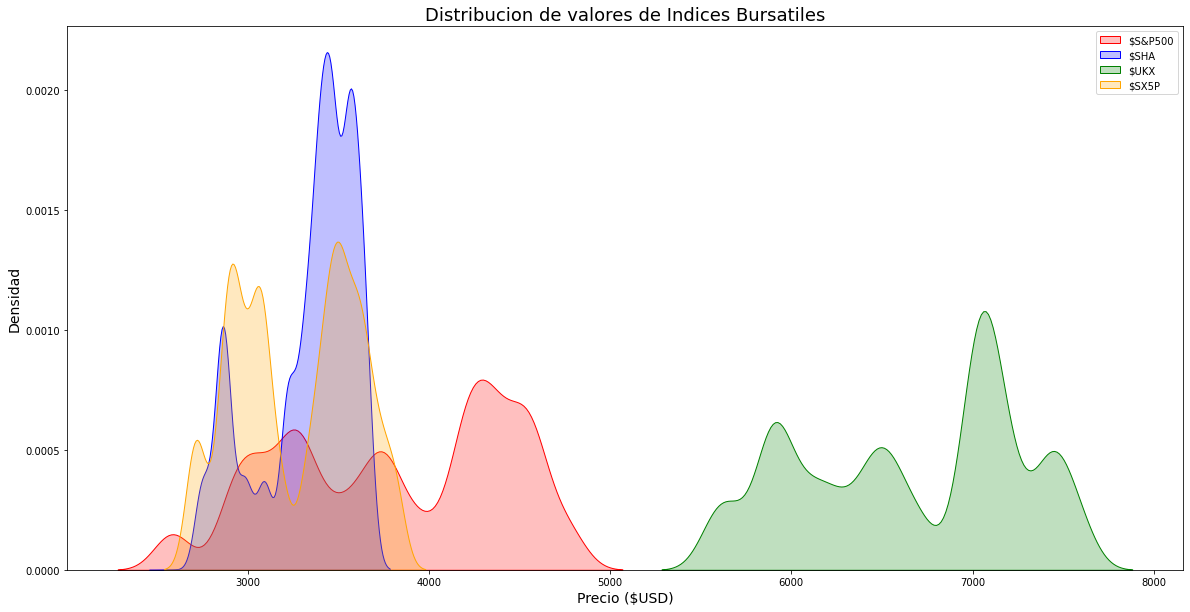

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))

sns.kdeplot(df_Integrado['$S&P500'], label='$S&P500', shade=True, color='red')
sns.kdeplot(df_Integrado['$SHA'], label='$SHA', shade=True, color='blue')
sns.kdeplot(df_Integrado['$UKX'], label='$UKX', shade=True, color='green')
sns.kdeplot(df_Integrado['$SX5P'], label='$SX5P', shade=True, color='orange')

plt.legend()
plt.title('Distribucion de valores de Indices Bursatiles', fontsize=18)
plt.xlabel('Precio ($USD)', fontsize=14)
plt.ylabel('Densidad', fontsize=14)
plt.show()

**Observaciones**

Se puede verificar un patron comun para los 4 Indices Bursatil, aun perteneciendo a distintas regiones. Se cumple asi el requisito de utilizarlos, de forma unificada, como una variable financiera representativa de nivel mundial. De aqui en adelante, el analisis utilizará un promedio que hemos realizado de estos indices, denominado "Promedio Bursatil". 

### Analisis Atemporal Multivariado Para Todas Las Variables

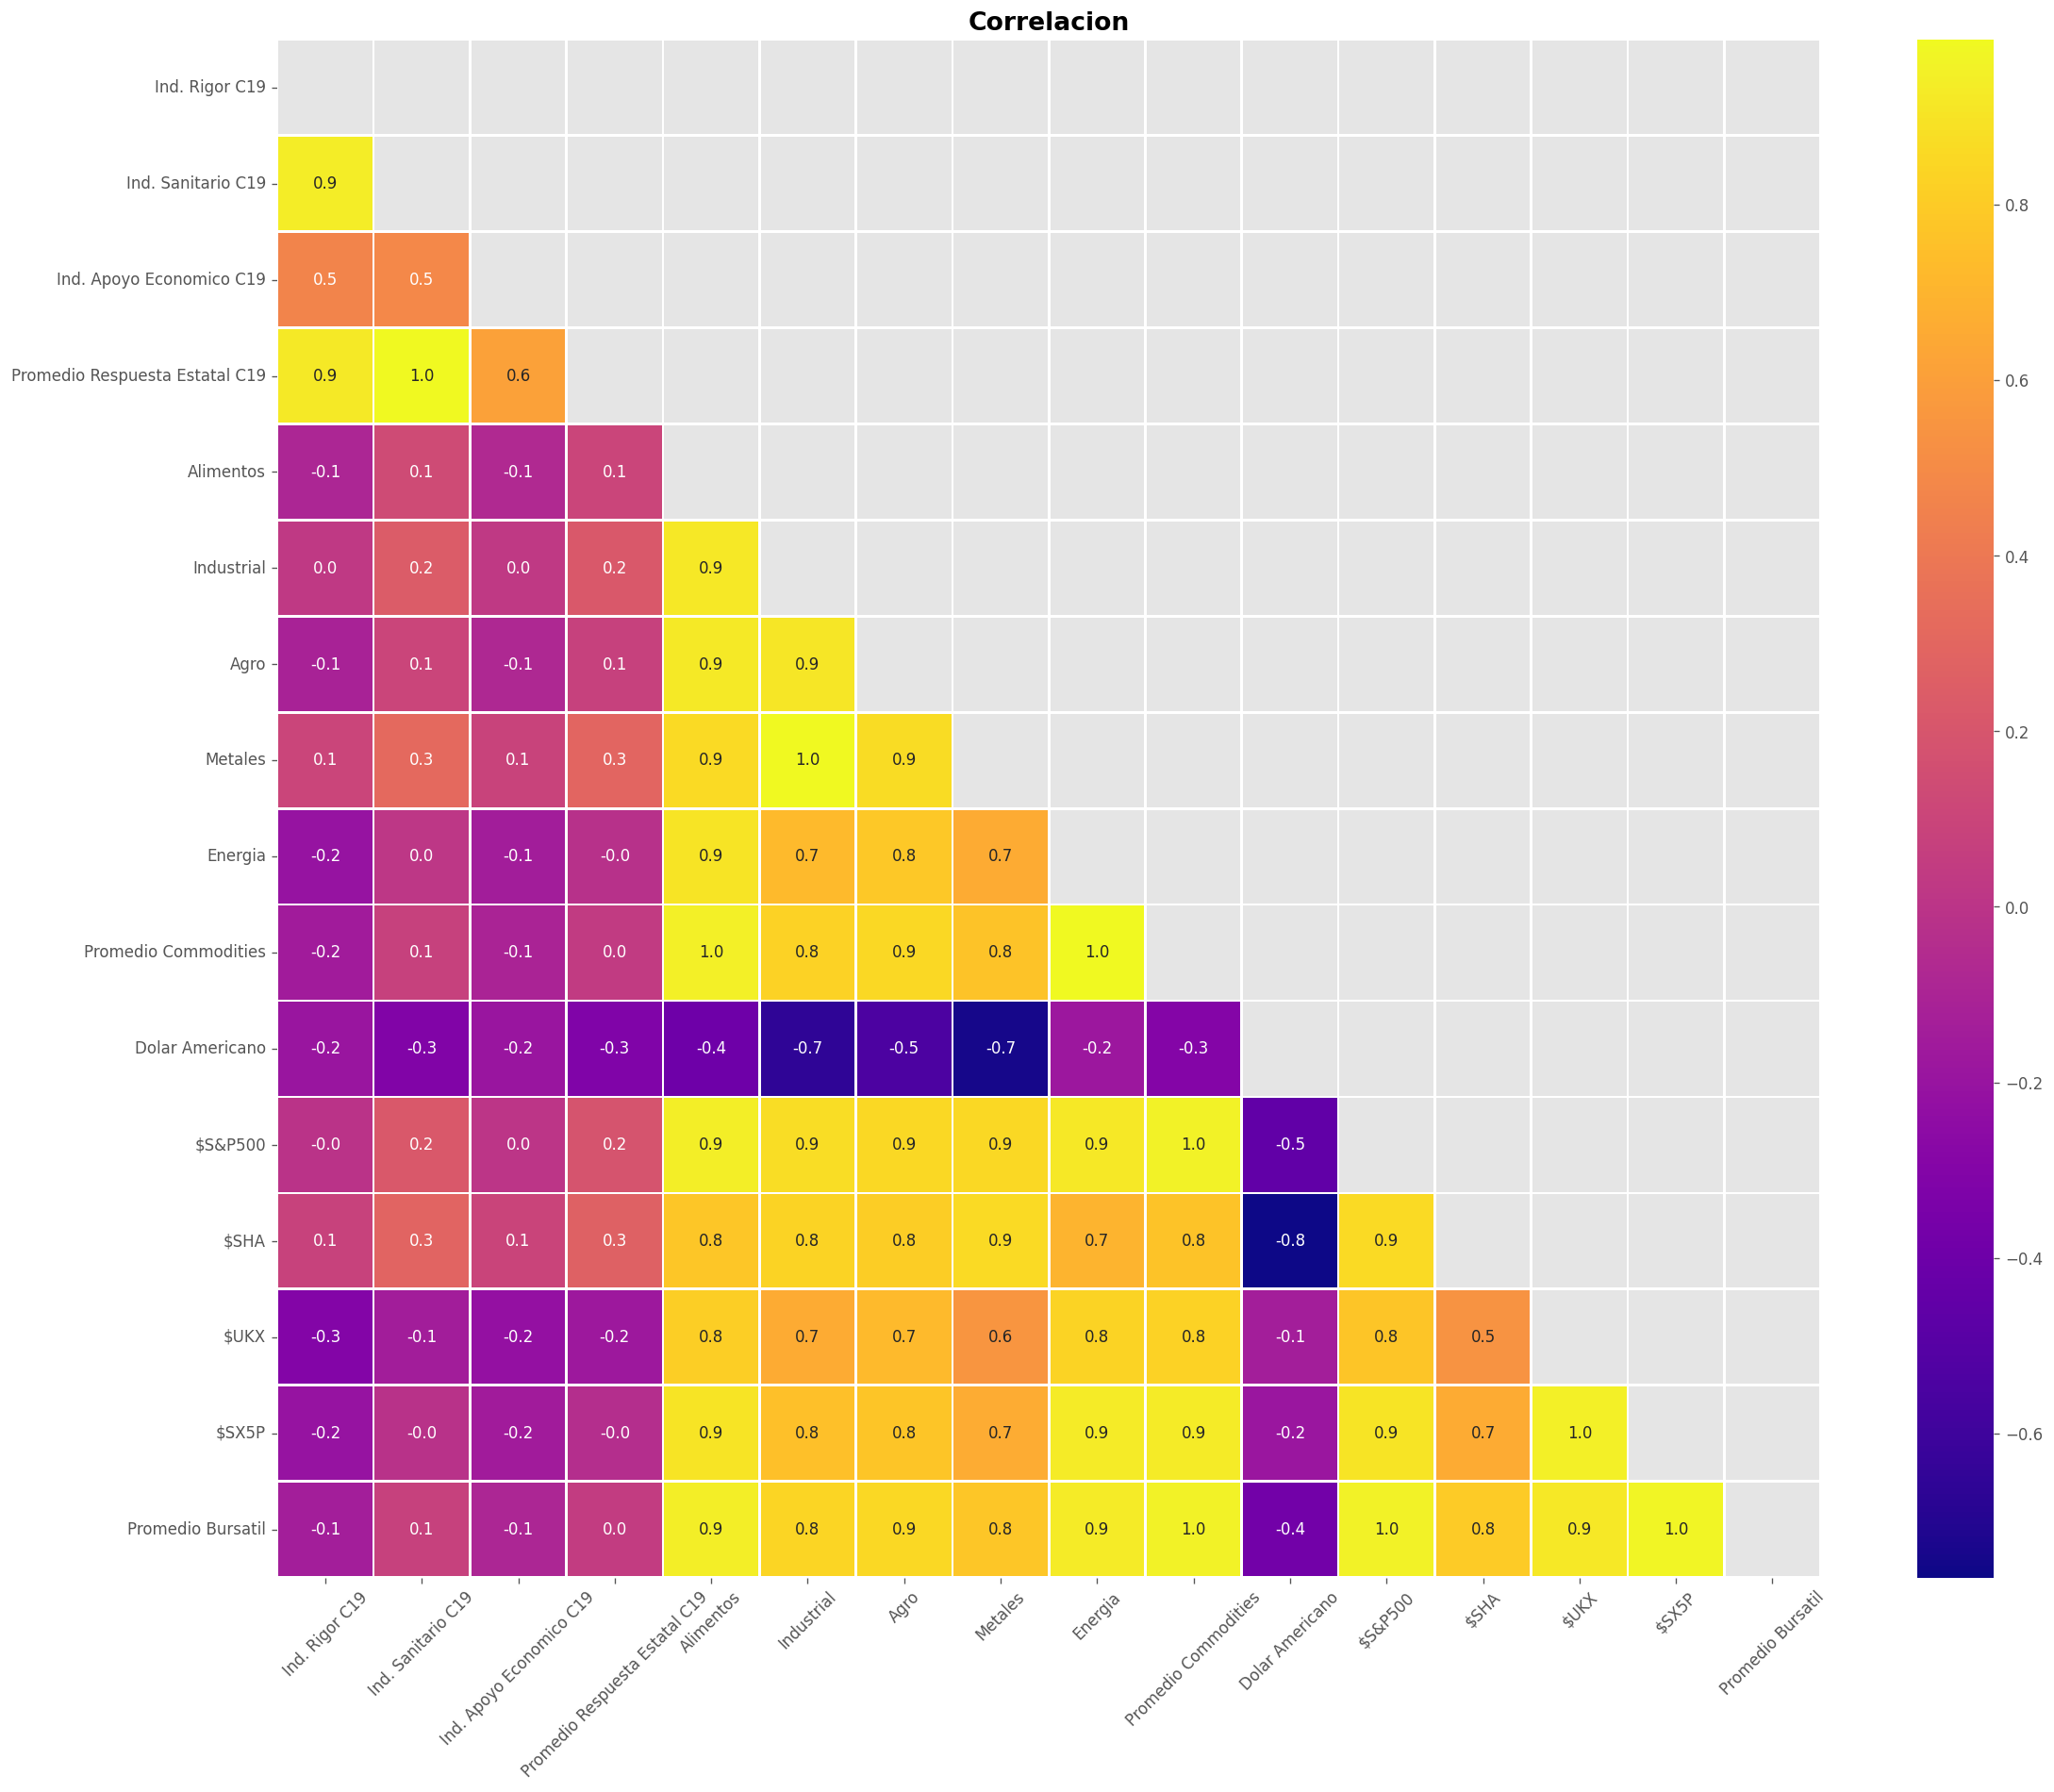

In [ ]:

plt.figure(dpi = 120,figsize= (22,18))
mask = np.triu(np.ones_like(df_Integrado.corr(),dtype = bool))
sns.heatmap(df_Integrado.corr(),mask = mask, fmt = ".1f",annot=True,lw=1,cmap = 'plasma')
plt.yticks(rotation = 0)
plt.xticks(rotation = 45)
plt.title('Correlacion', fontsize=16, fontweight='bold')
plt.show()

**Observaciones**

Luego de estudiar las correlaciones, es posible decir que la correlación entre Indices Bursatiles y de Commodities es positiva, y que potencialmente este será el campo sobre el cual luego buscaremos introducir la variable Tiempo para producir y probar una hipótesis. 
Añadimos entonces, sobre estos dos superindeces, la relacion con un tercero: las medidas Gubernamentales para el C19.

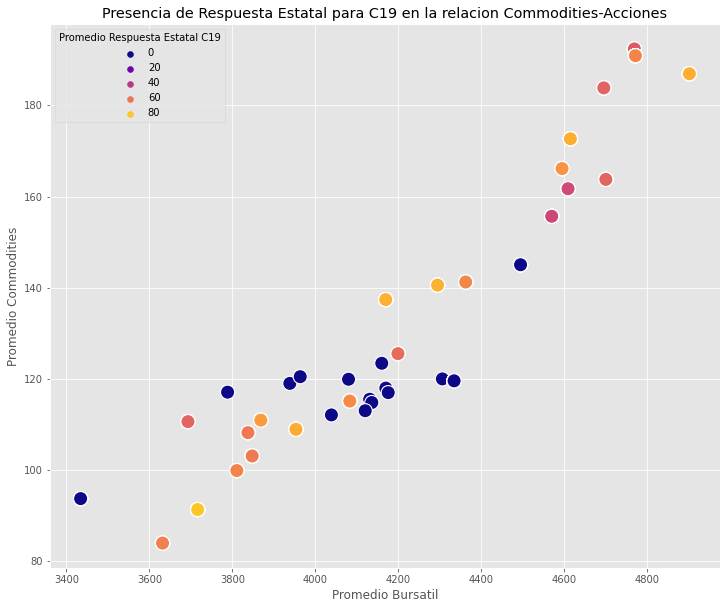

In [ ]:
# Relacion entre los 3 Superindices. 
# Aqui tenemos los candidatos a hipotesis de trabajo y por ende targets: los tres superdinces o variables aglutinantes.

plt.figure(figsize=(12,10))
sns.scatterplot(x='Promedio Bursatil',y='Promedio Commodities',data=df_Integrado,hue='Promedio Respuesta Estatal C19', s=200, palette='plasma')
plt.title('Presencia de Respuesta Estatal para C19 en la relacion Commodities-Acciones')
plt.show()

Habiendo corroborado una correlacion positiva entre los superindices, se procede a investigar los commodities de forma individual contra los mismos superindices

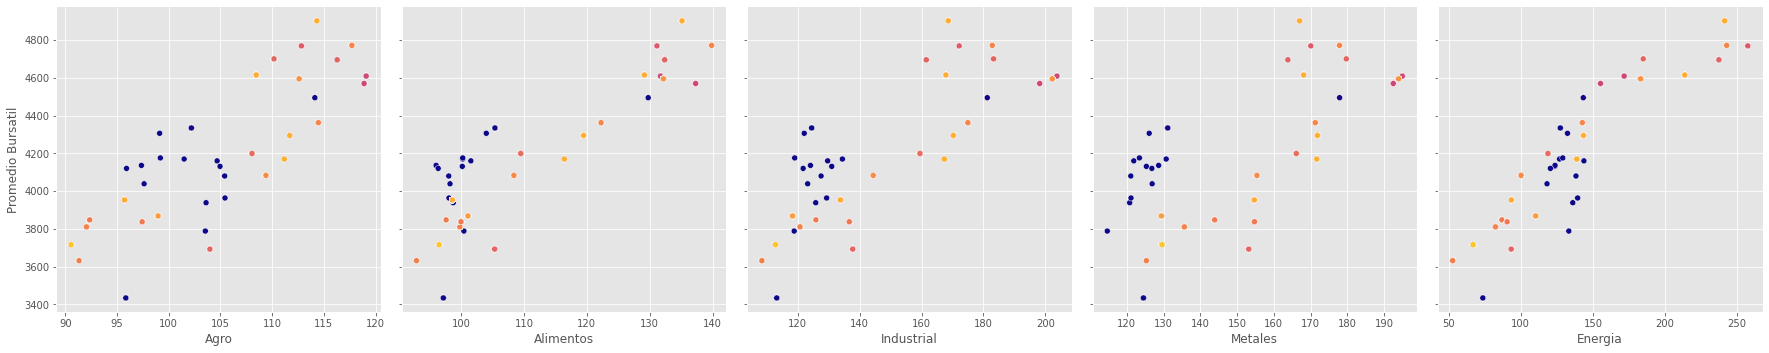

In [ ]:


g = sns.PairGrid(df_Integrado, x_vars=['Agro','Alimentos','Industrial','Metales','Energia'], y_vars='Promedio Bursatil', hue='Promedio Respuesta Estatal C19', height=5, palette='plasma')
g.map(sns.scatterplot)


## Definicion de Variable Target

El indice de energia se perfila como nuestra variable Target, Dependiente, a explicar. Producimos unas visualizaciones para obtener una mirada mas cercana. 

In [ ]:
px.box(df_Integrado, x="Energia", )

In [ ]:
# Profundizamos sobre el Indice de Energia.

fig = px.scatter(df_Integrado, x='Promedio Bursatil', y='Promedio Commodities',
	         size='Energia', log_x=True, hover_name='Energia', color='Promedio Respuesta Estatal C19', size_max=60, title="Precio del Indice de Energia")


fig.show()

# Implementacion de Modelos de Aprendizaje Automatico

La finalidad será desarrollar un modelo que pueda predecir el precio del ***Indice de Energia*** en relacion al resto de las variables que hasta ahora se han analizado.

**Variable dependiente Target**: Indice de Energia, [***'Energia'***]

**Variables independientes:** Los superindices como ***Promedio Bursatil, Promedio Commodities y Respuesta General Estatal C19.***

**Finalidad del Modelo:** Prediccion de Precio

**Modelos Utilizados:** Regresion Lineal Simple (SLR) Y Multivariada (MLR)

El precio de la energia ha sido la variable que mas curioso y volatil comportamiento ha tenido dentro de los commodities en los ultimos dos años. Registra maximos historicos, al igual que la mayoria de las variables, pero posee relativa autonomia respecto a esas variables, en lo que a precio refiere. Es sabido que el precio de la Energia es usualmente manipulado por los Gobiernos por medio de subsidios, pero al mismo tiempo, recibe todas las influencias de otros indices mundiales. Esto la convierte en una variable hibrida en lo que a publico-privado y nacional-internacional refiere, y por ello nos interesa su posible comportamiento futuro. 

A continuacion, comenzamos a experimentar para eventualmente aplicar estas tecnicas a nuestros objetivos.

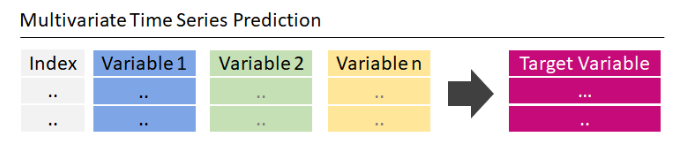

# PCA : Analisis de Componentes Principales.

Para esta altura, sabemos cuales serán nuestras 

- **Variables Feature** (caracteristicas o independientes) = "Promedio Bursatil", "Promedio Commodities", "Promedio Respuesta Estatal C19".
- **Variable Target** ( dependiente, a predecir) = "Energia".

Sabemos tambien, que si bien son pocas dimensiones, el dataframe sigue siendo considerable con sus casi 8000 filas.

Por ello motivo, antes de empezar, realizamos un PCA (analisis de componentes principales), a fines de 
- Obtener una primera visualizacion centrada de los datos.
- Tener a disposicion un dataframe con la dimensionalidad reducida, en caso de necesitarla.

El PCA es un método estadístico que permite simplificar la complejidad de espacios muestrales con muchas dimensiones a la vez que conserva su información.

In [ ]:
# Graficamos Primero, el grado de explicacion de la varianza que el PCA puede ofrecer, es decir, cuantos componentes principales (PCs) ayudan a explicar % de varianza.


df = pd.DataFrame(df_Integrado, columns=['Ind. Rigor C19', 'Ind. Sanitario C19', 'Ind. Apoyo Economico C19','Promedio Respuesta Estatal C19',
                             'Alimentos','Industrial','Agro','Metales','Energia','Promedio Commodities',
                             'Dolar Americano','$S&P500','$SHA','$UKX','$SX5P','Promedio Bursatil'])

pca = PCA()
pca.fit(df)
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
)

Con tan solo 2 componentes principales se explica el casi 100% de la varianza. Esto se debe a que, aunque las variables sean muchas, en realidad son muy parecidas entre si. De ahi nuestra decision de reunirlas en superindices, con los cuales probamos a continuacion:

In [ ]:

df = pd.DataFrame(df_Integrado, columns=['Promedio Respuesta Estatal C19','Energia','Promedio Commodities',
                             'Promedio Bursatil'])

pca = PCA()
pca.fit(df)
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
)

Confirmando que la varianza entre las caracteristicas se explica a partir de pocos componentes. 
¿Por que? Porque la varianza de estos datos no se explica por sus variables per se, sino porque su relacion la variable TIEMPO. 
Para visualizar esto, probamos plotear 3 componentes principales en 3D. 

In [ ]:

X = df_Integrado[['Ind. Rigor C19', 'Ind. Sanitario C19', 'Ind. Apoyo Economico C19','Promedio Respuesta Estatal C19',
                             'Alimentos','Industrial','Agro','Metales','Energia','Promedio Commodities',
                             'Dolar Americano','$S&P500','$SHA','$UKX','$SX5P','Promedio Bursatil']]

pca = PCA(n_components=3)                         #Definimos reducir a 3 componentes principal
components = pca.fit_transform(X)                 #Estadandarizacion y reduccion.

total_var = pca.explained_variance_ratio_.sum() * 100        #Queremos saber que % de la varianza explican los PCA

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=df_Integrado['Energia'],
    title=f'Varianza Explicada: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

El PCA de tres componentes explica la varianza de los datos con bastante claridad. Se pueden observar tres agrupaciones mas o menos marcadas.

- En las puntaciones mas bajas de PC1 y PC2, los maximos valores de Energia.
- Para las puntuaciones mas altas de PC1, los valores minimos de Energia.
- Para las puntuaciones mas altas de PC3, una grupacion de valores medios de Energia.

Tentativamente, esto se explica de la siguiente manera: estos 3 componentes principales representan a nuestros 3 superindices: (Promedio Bursatil, Promedio Commodities y Promedio Respuesta Estatal C19). De alli que se formen agrupaciones identificables. 

Se guarda la funcion **components** para nuestro 3-PCA por si llegaramos a necesitarlo. De momento, se utilizaran exclusivamente los 3 superindices sin estandarizarlos, lo cual es una reduccion de la dimensionalidad de misma efectividad, con la ventaja de conservar su identificacion. 

Se procede a desarrollar Modelos de ML. 

# Prueba de Regresión Lineal 

Diseñamos una regresion lineal Bivariada, a fines de realizar una primera aproximacion. 

**Importante:** En este modelo, las variables de entrenamiento y prueba recibirán su nombre en mayusculas, es decir: 

X_train, X_test, Y_train e Y_test.

A fines de no producir malfuncionamientos posteriormente. 



## Paso #1: Reimpresion de relacion de interes.

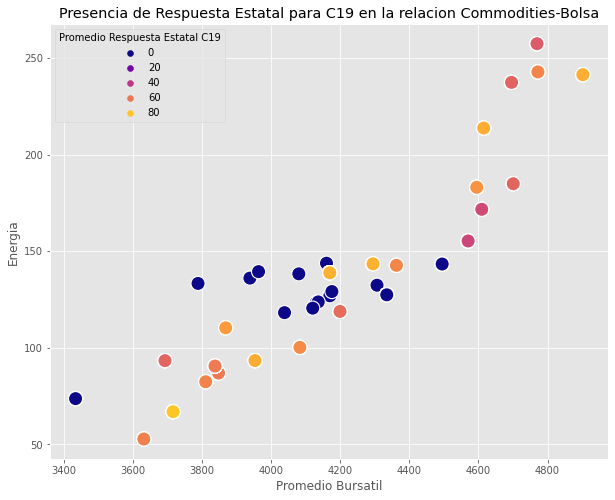

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Promedio Bursatil',y='Energia',data=df_Integrado,hue='Promedio Respuesta Estatal C19', s=200, palette='plasma')
plt.title('Presencia de Respuesta Estatal para C19 en la relacion Commodities-Bolsa')
plt.show()

## Paso #2: Definición de Variables

Escogemos el X por sobre el Hue como variable independiente, es decir, queremos ver como reacciona el Indice de energia en relacion al Promedio Bursatil. 

In [ ]:
# Correlación lineal entre las dos variables

corr_test = pearsonr(x = df_Integrado['Promedio Bursatil'], y =  df_Integrado['Energia'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])

Coeficiente de correlación de Pearson:  0.9296114664565132
P-value:  0.0


Alta correlacion y poco margen al azar. 

## Paso #3: Diseño del Modelo

 Dividimos los datos en set de entranamiento (80%) y prueba (20%)

In [ ]:
# División de los datos en train y test

X = df_Integrado[['Promedio Bursatil']]
Y = df_Integrado['Energia']

X_train, X_test, Y_train, Y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        Y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

# Creación del modelo

modelo = LinearRegression()
modelo.fit(X = X_train.reshape(-1, 1), y = Y_train)

LinearRegression()

In [ ]:
# Información del modelo

print("Intercept:", modelo.intercept_)
print("Coeficiente:", list(zip(X.columns, modelo.coef_.flatten(), )))
print("Coeficiente de determinación R^2:", modelo.score(X, Y))

Intercept: [-414.46341605]
Coeficiente: [('Promedio Bursatil', 0.13131786296485015)]
Coeficiente de determinación R^2: 0.8641645493598419


## Paso #4: Calculo de error del modelo.

La raíz del error cuadrático medio (RECM) o raíz de la desviación cuadrática media (RDCM) (en inglés: root-mean-square deviation, RMSD, o root-mean-square error, RMSE) es una medida de uso frecuente de las diferencias entre los valores (valores de muestra o de población) predichos por un modelo o un estimador y los valores observados. La RECM representa la raíz cuadrada del segundo momento de la muestra de las diferencias entre los valores previstos y los valores observados o la media cuadrática de estas diferencias. Estas desviaciones se denominan residuos cuando los cálculos se realizan sobre la muestra de datos que se utilizó para la estimación y se denominan errores (o errores de predicción) cuando se calculan fuera de la muestra.

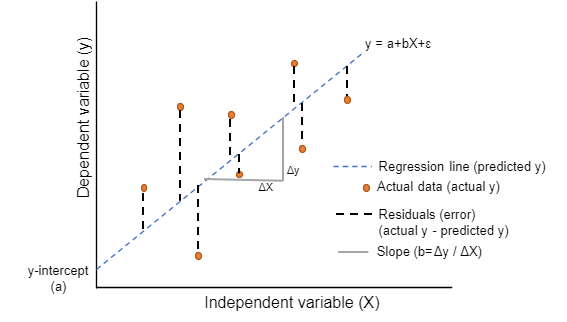

In [ ]:
# Error de test del modelo 

predicciones = modelo.predict(X = X_test)
print(predicciones[0:3,])

rmse = mean_squared_error(
        y_true  = Y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")

[[ 89.5109048 ]
 [104.70569472]
 [212.21431595]]

El error (rmse) de test es: 21.708750314593875


### Error (RMSE)  : 21.70

## Paso #5: Creacion de modelo de matrices

In [ ]:
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo

X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=Y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                 3.918e+04
Date:                Sun, 15 May 2022   Prob (F-statistic):               0.00
Time:                        17:35:35   Log-Likelihood:                -28146.
No. Observations:                6249   AIC:                         5.630e+04
Df Residuals:                    6247   BIC:                         5.631e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -414.4634      2.824   -146.779      0.0

### Observaciones

[No. Observations] : El modelo realizó 6249 observaciones, es decir el tamaño de nuestra muestra. 

[Coef] El termino de coeficiencia indica el cambio para Y por un cambio unitario de X. En este caso, Si Y sube 1 unidad, Y sube 0.13.

[std erro] La deviacion estandar para la constante es 2.8, y para el termino de coeficiencia es 0.001.

[P>t] El valor P es la probabilidad de que la hipotesis nula sera cierta, es decir que los resultados estadisticos no sigan la causalidad planteada. Como aqui son 0.0 y los valores-t Son disimiles entre si (confirmando que X tiene impacto significativo en Y), se descarta la hipotesis nula. 

[0.025 - 0.975] Los valores dentro de estos intervalos son escazos.

[R-squared] Es el coeficiente de determinacion que indica que proentaje de varacion de la variable dependiente es explicada por la independiente: En este caso, es 0.86 u 86%. 


## Paso #6: Predicciones

In [ ]:
# Predicciones con intervalo de confianza del 95%

predicciones_train = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones_train.head(4)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,121.765198,0.294564,121.187751,122.342645,78.882266,164.648131
1,175.828762,0.325861,175.189962,176.467563,132.944960,218.712565
2,188.965801,0.365291,188.249706,189.681897,146.080778,231.850825
3,191.619736,0.374182,190.886210,192.353261,148.734417,234.505054


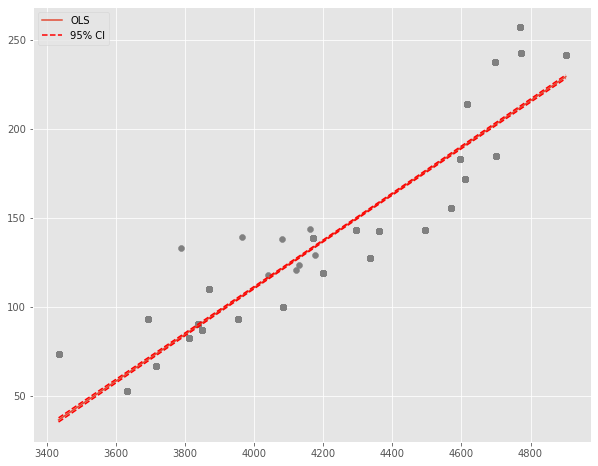

In [ ]:
# Predicciones con intervalo de confianza del 95%


predicciones_train['x'] = X_train[:, 1]
predicciones_train['y'] = Y_train
predicciones_train_sort = predicciones_train.sort_values('x')

# Gráfico del modelo

fig, ax = plt.subplots(figsize=(10, 8))

ax.scatter(predicciones_train_sort['x'], predicciones_train_sort['y'], marker='o', color = "gray")
ax.plot(predicciones_train_sort['x'], predicciones_train_sort["mean"], linestyle='-', label="OLS")
ax.plot(predicciones_train_sort['x'], predicciones_train_sort["mean_ci_lower"], linestyle='--', color='red', label="95% CI")
ax.plot(predicciones_train_sort['x'], predicciones_train_sort["mean_ci_upper"], linestyle='--', color='red')
ax.fill_between(predicciones_train_sort['x'], predicciones_train_sort["mean_ci_lower"], predicciones_train_sort["mean_ci_upper"], alpha=0.1)
ax.legend();


## Paso #7 : Diagnostico de Residuos

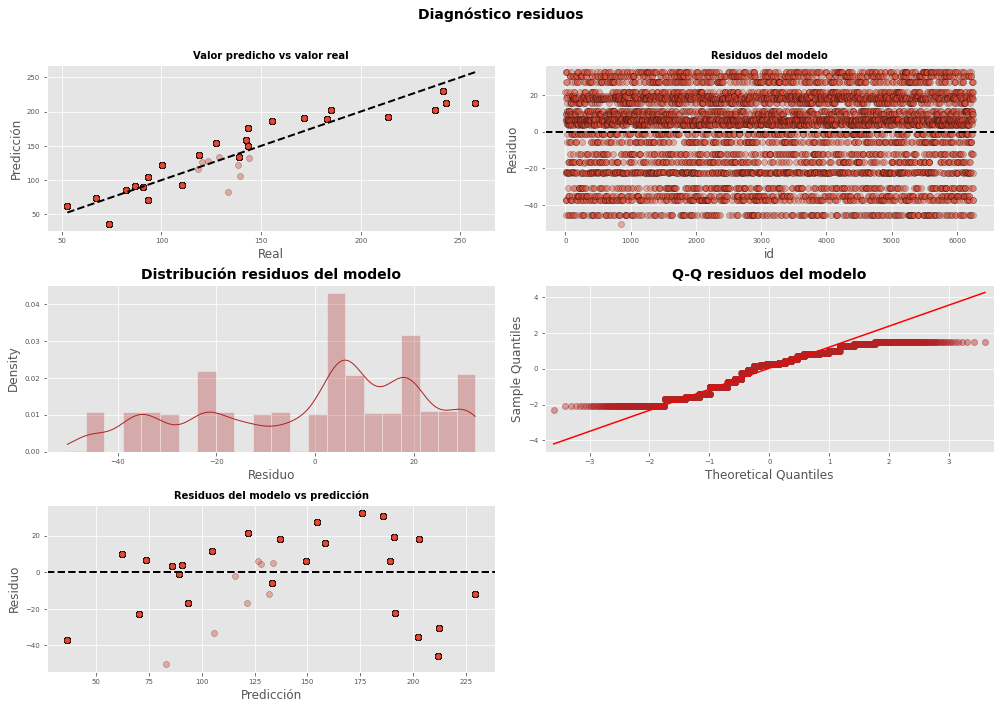

In [ ]:
# Diagnóstico errores (residuos) de las predicciones de entrenamiento

Y_train = Y_train.flatten()
prediccion_train = modelo.predict(exog = X_train)
residuos_train   = prediccion_train - Y_train

# Gráficos

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 10))

axes[0, 0].scatter(Y_train, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([Y_train.min(), Y_train.max()], [Y_train.min(), Y_train.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(Y_train))), residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = residuos_train,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 14,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    residuos_train,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 14, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

axes[2, 0].scatter(prediccion_train, residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
axes[2, 0].set_xlabel('Predicción')
axes[2, 0].set_ylabel('Residuo')
axes[2, 0].tick_params(labelsize = 7)

# Se eliminan los axes vacíos
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize = 14, fontweight = "bold");

## Paso #8: Aciertos

In [ ]:
#Verificamos el porcentaje de acierto del modelo

test_accuracy = r2_score(prediccion_train, Y_train)

#Calculo el accuracy en Test

print('% de aciertos sobre el set de evaluación:',test_accuracy*100)

% de aciertos sobre el set de evaluación: 84.05500336378844


### Precisión del modelo: 84%

## Paso #9: Interpretacion

La prueba de regresion lineal bivariada exhibe un comportamiento aceptable, con un % de aciertos del 84%, una media de error de 21.7, y una distribucion de residuos esperable. La hipotesis nula queda tambien descartada, los valores hallados fuera de los intervalos de confianza son escazos y el coeficiente de determinacion es del 86%; por lo cual la variable dependiente es altamente explicada por la variable independiente. Buscaremos mantener o mejorar estos valores mientras agregamos otras variables independientes que son de capital importancia conceptual dentro de lo que seria la validez economica del Indice estudiado. 

# Modelo de Regresion Lineal Final

A las variables analizadas anteriormente (Energia e Indice Bursatil) agregaremos ahora dos mas: ***Promedio Respuesta Estatal C19*** y ***Promedio Commodities***, a fines de añadir validez a los resultamos que obtengamos con los modelos. 

## Paso #1: Reimpresion de Variables Seleccionadas.

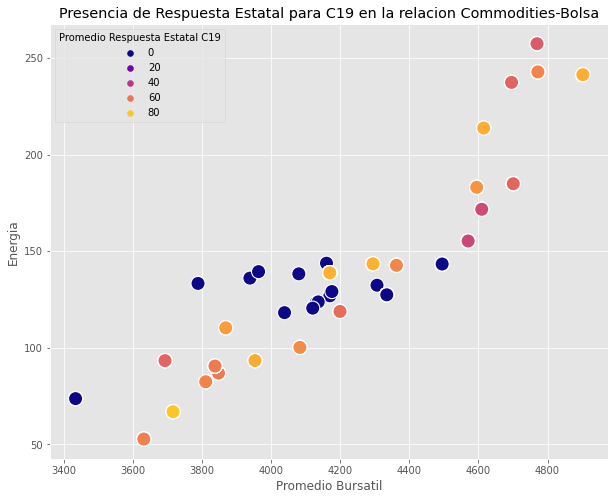

In [10]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Promedio Bursatil',y='Energia',data=df_Integrado,hue='Promedio Respuesta Estatal C19', s=200, palette='plasma')
plt.title('Presencia de Respuesta Estatal para C19 en la relacion Commodities-Bolsa')
plt.show()

## Paso #2 : Creacion de DataFrame

Aislamos nuestras Features y Target.

In [11]:
df_Datos = df_Integrado[['Fecha','Energia', 'Promedio Bursatil', 'Promedio Commodities', 'Promedio Respuesta Estatal C19']]
df_Datos.set_index(['Fecha'], inplace=True)

Realizamos un Indice Temporal con la Fecha. 

In [12]:
df_Datos = df_Datos.assign(Time=[0 + i for i in range(len(df_Datos))])[['Time'] + df_Datos.columns.tolist()]

In [13]:
df_Datos.head(3)

,Time,Energia,Promedio Bursatil,Promedio Commodities,Promedio Respuesta Estatal C19
Fecha,,,,,
2019-01-01,0,133.30,3788.66,117.08,0.0
2019-02-01,1,136.05,3938.79,119.01,0.0
2019-03-01,2,138.26,4080.34,119.91,0.0


## Paso #3: Matriz De Correlaciones

In [14]:
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

corr_matrix = df_Datos.select_dtypes(include=['float64', 'int']).corr(method='pearson') 

tidy_corr_matrix(corr_matrix).head(5)

,variable_1,variable_2,r,abs_r
16,Promedio Commodities,Energia,0.986789,0.986789
8,Energia,Promedio Commodities,0.986789,0.986789
13,Promedio Bursatil,Promedio Commodities,0.955467,0.955467
17,Promedio Commodities,Promedio Bursatil,0.955467,0.955467
3,Time,Promedio Commodities,0.942292,0.942292


## Paso #4: HeatMap Correlaciones

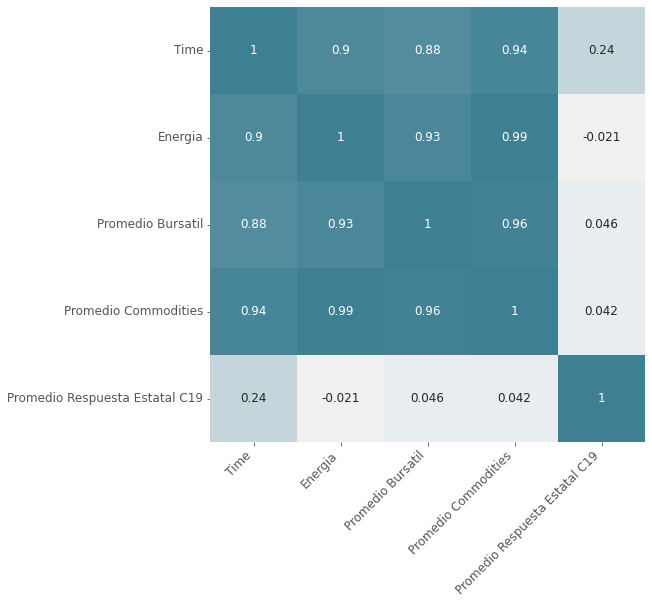

In [15]:
# Heatmap matriz de correlaciones

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 12},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 12)

## Paso #5 : Primera definicion del Modelo

Esta version del Modelo, que utiliza el Dataframe df_Datos, permitirá realizar visualizaciones mas adelante. 

In [16]:
# División de los datos en train y test


X2 = df_Datos.loc[:, ['Time','Promedio Bursatil', 'Promedio Commodities', 'Promedio Respuesta Estatal C19']] 
Y2 = df_Datos.loc[:, 'Energia']

In [17]:
# Entrenamos los datos

model = LinearRegression()
model.fit(X2, Y2)

LinearRegression()

## Paso #6: Creacion del Modelo en Matriz



Creacion de un nuevo Dataframe (df_Stats), igual al anterior, para poder manipular nuestros datos con arrays, manipular las partes Train y Test y recibir informacion profundizada del modelo. La finalidad es, a su vez, poder conservar el dataframe anterior en formato pandas. 

In [24]:
df_Stats = df_Integrado[['Fecha','Energia', 'Promedio Bursatil', 'Promedio Commodities', 'Promedio Respuesta Estatal C19']]
df_Stats.set_index(['Fecha'], inplace=True)

In [25]:
df_Stats = df_Stats.assign(Time=[0 + i for i in range(len(df_Datos))])[['Time'] + df_Stats.columns.tolist()]

In [26]:
# Copiamos Nuestras Variables para producir una Matriz que nos permita obtener mas datos,
#  sin transformar nuestras variables en Arrays de numpy.

MX2 = df_Stats[['Time','Promedio Bursatil', 'Promedio Commodities', 'Promedio Respuesta Estatal C19']] 
MY2 = df_Stats['Energia']

MX2_train, MX2_test, MY2_train, MY2_test = train_test_split(
                                        MX2,
                                        MY2.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [27]:
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo

MX2_train = sm.add_constant(MX2_train, prepend=True)
modelo = sm.OLS(endog= MY2_train, exog= MX2_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                 9.334e+04
Date:                Sat, 21 May 2022   Prob (F-statistic):               0.00
Time:                        17:21:30   Log-Likelihood:                -21511.
No. Observations:                6249   AIC:                         4.303e+04
Df Residuals:                    6244   BIC:                         4.307e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

### Observaciones

[No. Observations] : El modelo realizó 6249 observaciones, es decir el tamaño de nuestra muestra. 


[std erro] La deviacion estandar para la constante es de 2, y para las variables, valores cercanos a cero 0.

[P>t] El valor P es la probabilidad de que la hipotesis nula sera cierta, es decir que los resultados estadisticos no sigan la causalidad planteada. Como aqui son 0.0 y los valores-t Son disimiles entre si (confirmando que X tiene impacto significativo en Y), se descarta la hipotesis nula. 

[0.025 - 0.975] Los valores dentro de estos intervalos son escazos.

[R-squared] Es el coeficiente de determinacion que indica que proentaje de varacion de la variable dependiente es explicada por la independiente: En este caso, es 0.98 o 98%.

## Paso #7: Mejoras sobre el Modelo Anterior

Con las nuevas variables añadidas, el modelo ha mejorado sustancialmente:

 - R2  alto (0.98), es capaz de explicar el 98% de la variabilidad observada el precio del Indice de Energia, una mejora de 14 puntos, partiendo del 84% registrado en la prueba bivariada. 
 - Media de Error (RMSE) de 7.56, un tercio del registrado en la prueba (21.7).
 - Media de Error Absoluta (MAE) de 6.34.

## Paso #8 : Definición de Funcion Predictiva

In [ ]:
#Realizamos la prediccion manteniendo el indice de la variable

y_predict = pd.Series(model.predict(X2), index=X2.index)

## Paso #9 : Aciertos

In [ ]:
#Verificamos el porcentaje de acierto del modelo

test_accuracy = r2_score(y_predict, Y2)

#Calculo el accuracy en Test

print('% de aciertos sobre el set de evaluación:',test_accuracy*100)

% de aciertos sobre el set de evaluación: 98.34282391835575


### Precision del Modelo: 98%.

### Visualizacion de Precision

In [ ]:
#Creamos un dataframe con el valor actual y el valor predicho

df_predict = pd.DataFrame({'Actual': df_Datos.Energia, 'Predict': y_predict})
df_predict.head(5)

,Actual,Predict
Fecha,,
2019-01-01,133.30,133.416971
2019-02-01,136.05,133.958625
2019-03-01,138.26,132.158411
2019-04-01,143.77,138.674383
2019-05-01,139.41,136.914732


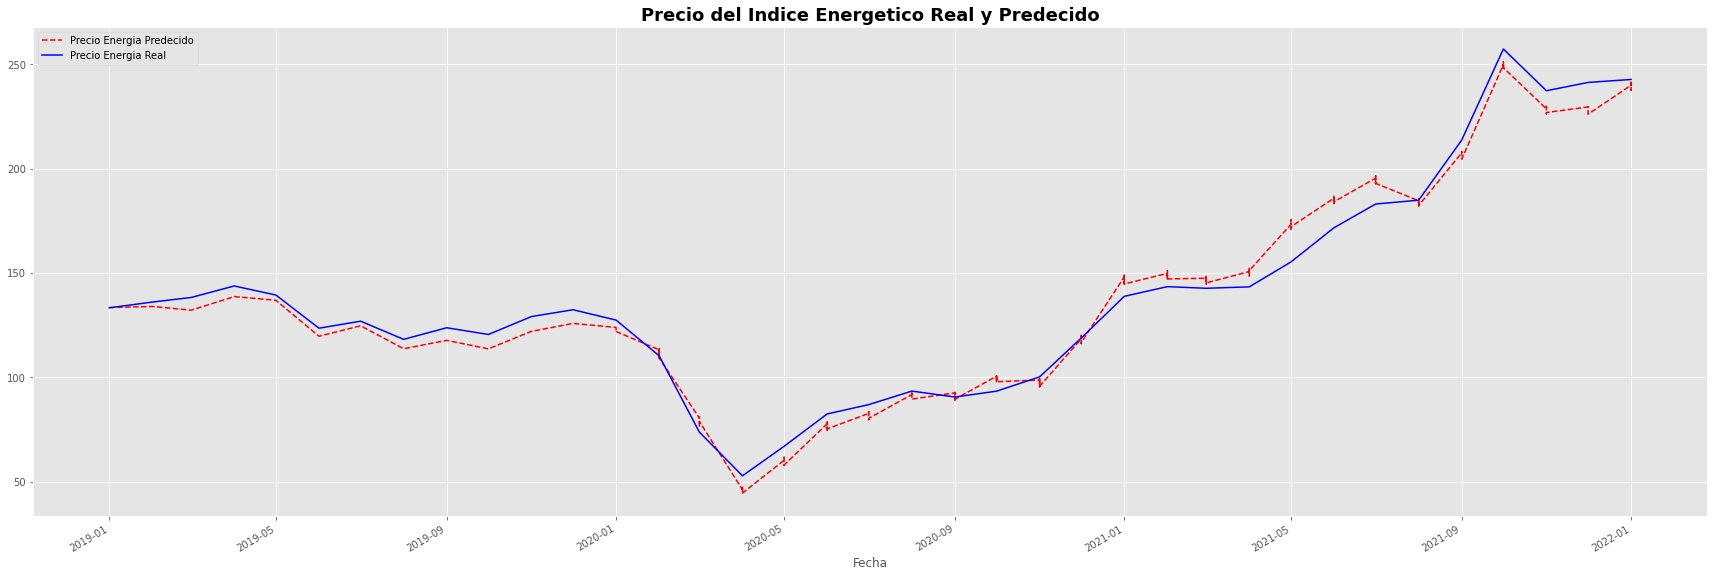

In [ ]:
# Ploteamos el valor actual y el valor predicho

plt.figure(figsize=(30,10))

df_predict.Predict.plot(color='r', ls='--', label='Precio Energia Predecido')
df_predict.Actual.plot(color='b', ls='-', label='Precio Energia Real')

plt.title('Precio del Indice Energetico Real y Predecido', fontsize=18, fontweight='bold')
plt.legend(loc='upper left')
plt.show()

## Paso #10: Error y Residuos

La raíz del error cuadrático medio (RECM) o raíz de la desviación cuadrática media (RDCM) (en inglés: root-mean-square deviation, RMSD, o root-mean-square error, RMSE) es una medida de uso frecuente de las diferencias entre los valores (valores de muestra o de población) predichos por un modelo o un estimador y los valores observados. La RECM representa la raíz cuadrada del segundo momento de la muestra de las diferencias entre los valores previstos y los valores observados o la media cuadrática de estas diferencias. Estas desviaciones se denominan residuos cuando los cálculos se realizan sobre la muestra de datos que se utilizó para la estimación y se denominan errores (o errores de predicción) cuando se calculan fuera de la muestra.

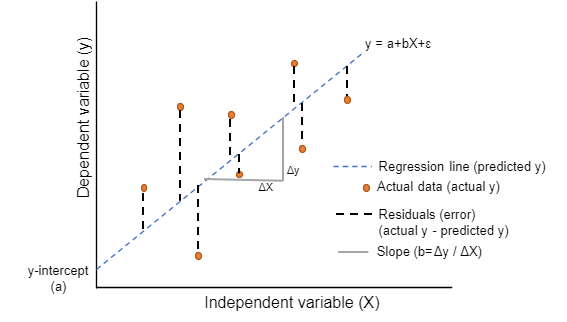

In [ ]:
#Verificamos la media del error

RMSE = np.sqrt(mean_squared_error(Y2, y_predict))
print("La media del error de test es de : ", RMSE)

La media del error de test es de :  7.565086931155757


### Media de Error (RMSE): 7.56

In [ ]:
#Verificamos la media del error absoluto

MAE = mean_absolute_error(Y2, y_predict)
print("La media del error absoluto del test es de : ", MAE)

La media del error absoluto del test es de :  6.330832521208693


### Media de Error Absoluto (MAE): 6.34

### Diagnostico Visual de Residuos

In [ ]:
# Diagnóstico errores (residuos) de las predicciones de entrenamiento

MY2_train = MY2_train.flatten()
prediccion_train = modelo.predict(exog = MX2_train)
residuos_train   = prediccion_train - MY2_train

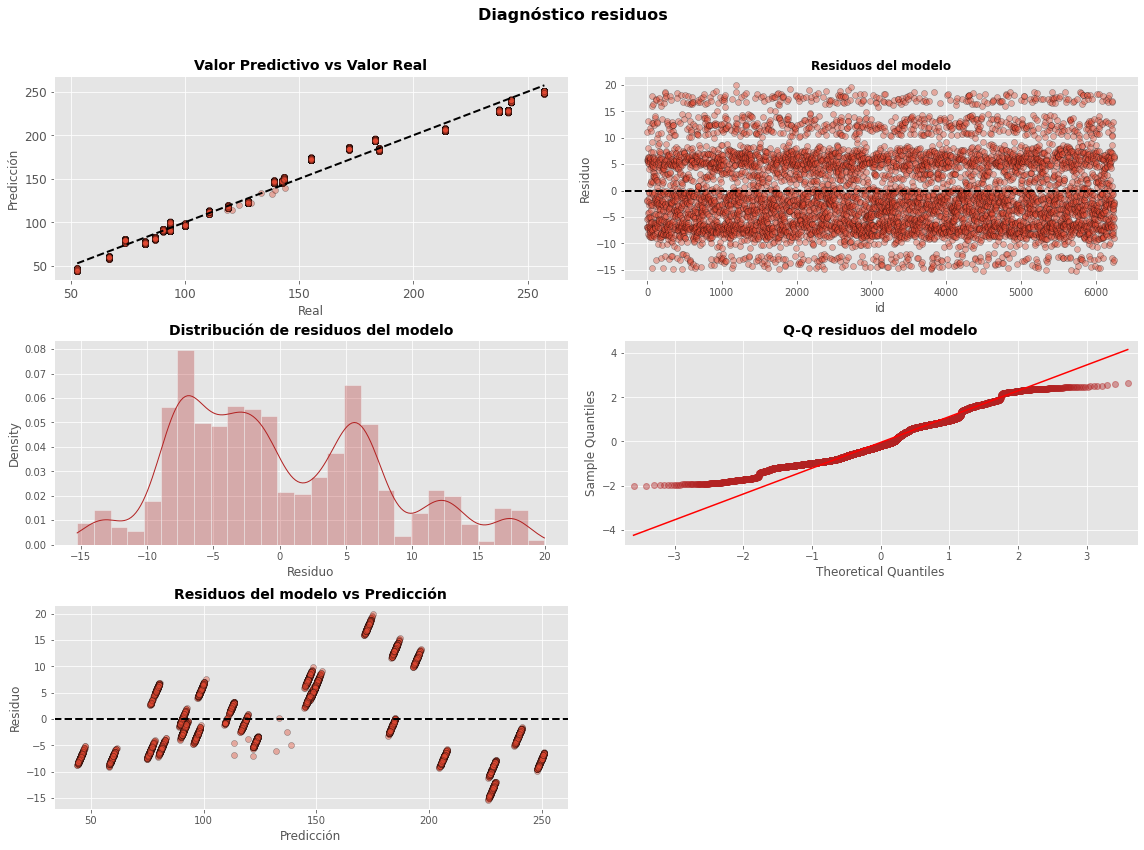

In [ ]:
# Gráficos

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 12))

axes[0, 0].scatter(MY2_train, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([MY2_train.min(), MY2_train.max()], [MY2_train.min(), MY2_train.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor Predictivo vs Valor Real', fontsize = 14, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 12)

axes[0, 1].scatter(list(range(len(MY2_train))), residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 12, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 10)

sns.histplot(
    data    = residuos_train,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribución de residuos del modelo', fontsize = 14,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 10)


sm.qqplot(
    residuos_train,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 14, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 10)

axes[2, 0].scatter(prediccion_train, residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('Residuos del modelo vs Predicción', fontsize = 14, fontweight = "bold")
axes[2, 0].set_xlabel('Predicción')
axes[2, 0].set_ylabel('Residuo')
axes[2, 0].tick_params(labelsize = 10)

# Se eliminan los axes vacíos
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize = 16, fontweight = "bold");

### Observaciones

Los residuos no parecen distribuirse de forma aleatoria en torno a cero, sin mantener aproximadamente la misma variabilidad a lo largo del eje X. Este patrón apunta a una falta de homocedasticidad y de distribución normal.

## Paso #11: Test de Normalidad 

Se comprueba si los residuos siguen una distribución normal empleando dos test estadísticos: Shapiro-Wilk test y D'Agostino's K-squared test. Este último es el que incluye el summary de statsmodels bajo el nombre de Omnibus.

En ambos test, la hipótesis nula considera que los datos siguen una distribución normal, por lo tanto, si el p-value no es inferior al nivel de referencia alpha seleccionado, no hay evidencias para descartar que los datos se distribuyen de forma normal.

In [52]:
# Normalidad de los residuos Shapiro-Wilk test

shapiro_test = stats.shapiro(residuos_train)
shapiro_test

(0.9652750492095947, 2.6589308775164595e-36)

P- Value : 2.6

In [53]:
# Normalidad de los residuos D'Agostino's K-squared test

k2, p_value = stats.normaltest(residuos_train)
print(f"Estadítico= {k2}, p-value = {p_value}")

Estadítico= 311.2480467789808, p-value = 2.5902721155323094e-68


P-Value: 2.59

## Paso #12: Optimizacion del Modelo

A continuacion se despliegan tecnicas de optimizacion del modelo. Estas se efectuan en varios niveles. A nivel dataframe, se opera con un shifting. A nivel parametros, con GridSearchCV, y a nivel hiperparametros, con RandomSearch. 



## Shifting

Pandas dataframe.shift() cambia el índice por el número deseado de períodos con una frecuencia de tiempo opcional. Esta función toma un parámetro escalar llamado período, que representa el número de desplazamientos a realizar sobre el eje deseado. Esta función es muy útil cuando se trata de datos de series temporales.

In [28]:
# Shiftiamos los valores en 3

df_Datos['close_Energia_shift'] = df_Datos['Energia'].shift(3)
df_Datos

,Time,Energia,Promedio Bursatil,Promedio Commodities,Promedio Respuesta Estatal C19,close_Energia_shift
Fecha,,,,,,
2019-01-01,0,133.30,3788.66,117.08,0.00,NaN
2019-02-01,1,136.05,3938.79,119.01,0.00,NaN
2019-03-01,2,138.26,4080.34,119.91,0.00,NaN
2019-04-01,3,143.77,4160.48,123.42,0.00,133.30
2019-05-01,4,139.41,3963.84,120.48,0.00,136.05
...,...,...,...,...,...,...
2022-01-01,7807,242.76,4772.22,190.90,63.02,242.76
2022-01-01,7808,242.76,4772.22,190.90,79.43,242.76
2022-01-01,7809,242.76,4772.22,190.90,50.52,242.76


In [29]:
# preparamos los datos, los entrenamos y realizamos la prediccion.
# rellenamos los valores NaN con un valor promedio de 130 dado que es un valor coherente para los primeros dias de valores del dataset


X3 = df_Datos.loc[:, ['close_Energia_shift']]
X3.fillna(130,inplace=True)  
y3 = df_Datos.loc[:, 'Energia']  
y3, X3 = y3.align(X3, join='inner') 

model = LinearRegression()
model.fit(X3, y3)

y_pred3 = pd.Series(model.predict(X3), index=X3.index)

In [30]:
#Verificamos la media del error

rmse = np.sqrt(mean_squared_error(y3, y_pred3))
rmse

1.7084108454256708

### Error RMSE Actualizado: 1.7

In [31]:
#Verificamos la media del error absoluto

mae = mean_absolute_error(y3, y_pred3)
mae

0.17827191095107872

### Error MAE Actualizado: 1.78

In [32]:
#Verificamos el porcentaje de aciertos

test_accuracy =r2_score(y_pred3, df_Datos.Energia)

print('% de aciertos sobre el set de evaluación:',test_accuracy*100)

% de aciertos sobre el set de evaluación: 99.91679515563095


### Precision Actualizada: 99.9%

In [33]:
#Creamos un dataset con el valor actual y el valor predicho

data_df2 = pd.DataFrame({'Actual2': df_Datos.Energia, 'Predict2': y_pred3})
data_df2

,Actual2,Predict2
Fecha,,
2019-01-01,133.30,130.041724
2019-02-01,136.05,130.041724
2019-03-01,138.26,130.041724
2019-04-01,143.77,133.342157
2019-05-01,139.41,136.092518
...,...,...
2022-01-01,242.76,242.816518
2022-01-01,242.76,242.816518
2022-01-01,242.76,242.816518


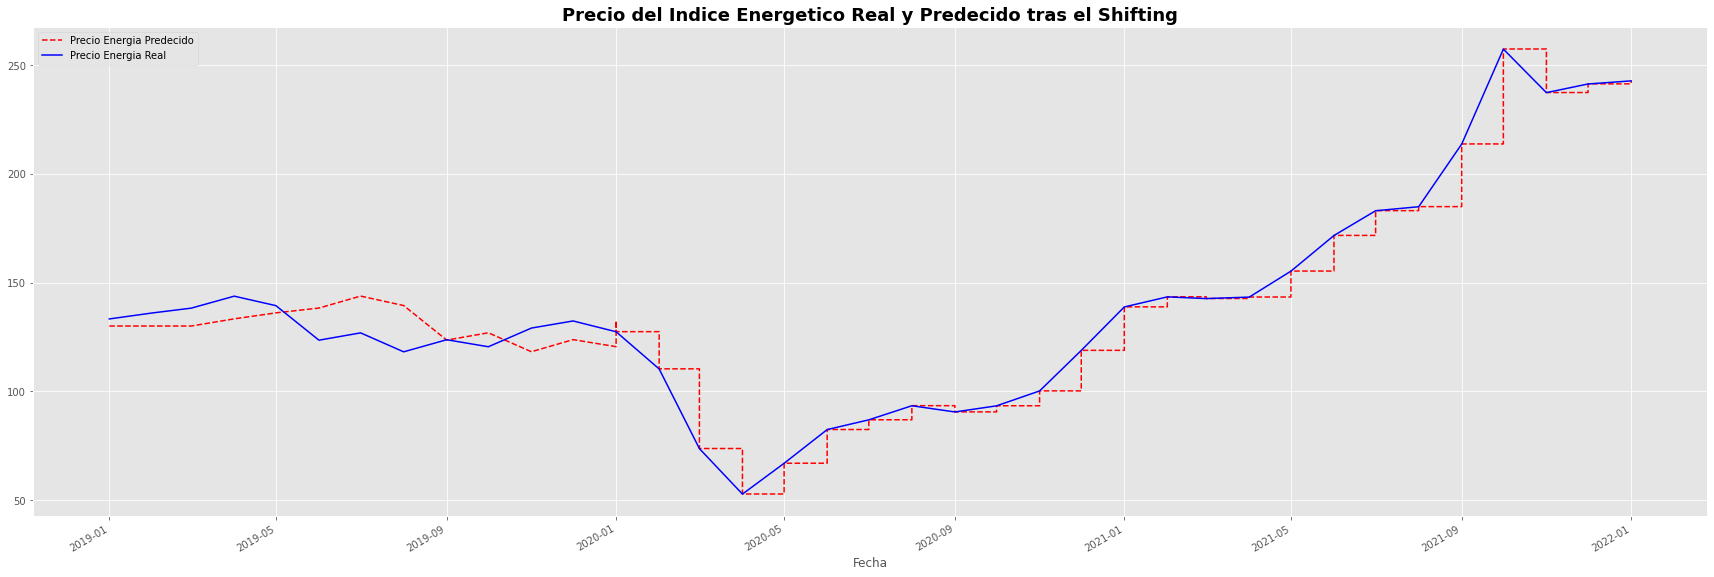

In [34]:
# Ploteamos el valor actual y el valor predicho

plt.figure(figsize=(30,10))

data_df2.Predict2.plot(color='r', ls='--', label='Precio Energia Predecido')
data_df2.Actual2.plot(color='b', ls='-', label='Precio Energia Real')
plt.title('Precio del Indice Energetico Real y Predecido tras el Shifting', fontsize=18, fontweight='bold')
plt.legend(loc='upper left')
plt.show()

## GridSearchCV

GridSearchCV es una técnica para buscar los mejores valores de parámetros del conjunto dado de la cuadrícula de parámetros. Es básicamente un método de validación cruzada. se requiere que se introduzcan el modelo y los parámetros. Se extraen los mejores valores de los parámetros y luego se hacen las predicciones.



In [35]:
model_params = {
        'random_forest': {
        'model':RandomForestRegressor(max_features="sqrt",
                                      bootstrap=True,
                                      max_samples=2/3,
                                      oob_score=True),
    'params':{
        'n_estimators':[100,125,150],
        'criterion':['squared_error', 'absolute_error', 'poisson']
         }
   },
   'knn':{
       'model':KNeighborsRegressor(),
        'params':{
            'n_neighbors':np.arange(3,8,1)
        }
        }
   }

In [36]:

scores = []

for model_name, mp in model_params.items():
  clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
  clf.fit(MX2_train,MY2_train)
  scores.append({
      'model' : model_name,
      'best_score': clf.best_score_,
      'best_parans': clf.best_params_
  })

In [37]:
df_scores = pd.DataFrame(scores, columns = ['model','best_score', 'best_params'])
df_scores

,model,best_score,best_params
0,random_forest,0.999913,NaN
1,knn,0.999952,NaN


Observacion:

Tanto en Random Forest Regressor y el K-Nearest Neighbors arrojan un score del 99%

## Random Search 

RandomSearch o "búsqueda aleatoria" es una técnica en la que se utilizan combinaciones aleatorias de los hiperparámetros para encontrar la mejor solución para el modelo construido. Es similar a la búsqueda en cuadrícula y, sin embargo, ha demostrado que produce mejores resultados comparativamente.

In [38]:
# Datos

# Features

x1 = df_Integrado[['Promedio Bursatil']]
x2 = df_Integrado['Promedio Respuesta Estatal C19']
x3 = df_Integrado['Promedio Commodities']

# Target 

y1 = df_Integrado['Energia']

df_search = df_Integrado[['Promedio Bursatil', 'Promedio Commodities', 'Promedio Respuesta Estatal C19']]

In [39]:
rf = RandomForestRegressor(random_state = 35)

In [40]:
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 20, num = 20)] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [41]:
rf_random = RandomizedSearchCV(estimator = rf,

param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)

In [42]:
# Random Search Bivariado

rf_random.fit(x1, y1)

# this prints the contents of the parameters in the random grid
print ('Random grid: ', random_grid, '\n')

# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Random grid:  {'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 19, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': True}  



In [43]:
# Random Search Multivariado

rf_random.fit(df_search, y1)

# this prints the contents of the parameters in the random grid
print ('Random grid: ', random_grid, '\n')

# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Random grid:  {'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 4, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 100, 'bootstrap': False}  



### Observaciones

Resultados del Random Search Multivariado. Mejores Parametros:

- 'n_estimators': 4
- 'min_samples_split': 10
- 'min_samples_leaf': 1,
- 'max_features': 'sqrt'
- 'max_depth': 100
- 'bootstrap': False

Se procede a correr el search con dichos parametros.

In [46]:
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 8, num = 8)] # number of trees in the random forest
max_features = ['sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(90, 110, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [10] # minimum sample number to split a node
min_samples_leaf = [1] # minimum sample number that can be stored in a leaf node
bootstrap = [False] # method used to sample data points

random_grid1 = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [47]:
rf_random = RandomizedSearchCV(estimator = rf,

param_distributions = random_grid1,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)

In [48]:
# Random Search Multivariado

rf_random.fit(df_search, y1)

# this prints the contents of the parameters in the random grid
print ('Random grid: ', random_grid1, '\n')

# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Random grid:  {'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8], 'max_features': ['sqrt'], 'max_depth': [90, 91, 93, 95, 97, 99, 100, 102, 104, 106, 108, 110], 'min_samples_split': [10], 'min_samples_leaf': [1], 'bootstrap': [False]} 

Best Parameters:  {'n_estimators': 4, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 90, 'bootstrap': False}  



# Conclusiones

